In [79]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import Workbook

In [80]:
file3 = r'C:\Users\Administrator\Desktop\PPG_dataset\json\seven_sleep_scale.json'
file4 = r'C:\Users\Administrator\Desktop\PPG_dataset\json\eight_sleep_scale.json'

In [81]:
with open(file3, 'r', encoding='utf-8-sig') as file:
    datas_seven = json.load(file)

with open(file4, 'r', encoding='utf-8-sig') as file:
    datas_eight = json.load(file)

def file_load(datas):

    columns = ['userId', 'userName', 'gender']
    all_rows = []
    try:

        for idx, data in enumerate(datas):
            user_id = data['userId']
            user_name = data['userName']
            gender = data['gender']
            dimension = data['dimensions']
            # Initialize a list to store the selected options
            option_list = []
            for result in dimension:
                question = result['question']['title']
                selected_option = result['selectedOption']['optionIndex']
                # Convert option to numerical values
                option_value = {'a': 1, 'b': 2, 'c': 3, 'd': 4}.get(selected_option, None)
                option_list.append(option_value)
                # Add question titles to columns (only on the first iteration)
                if idx == 0:
                    columns.append(question)
            # Combine all user information and answers into a single row
            row = [user_id, user_name, gender] + option_list
            all_rows.append(row)
    except:
        for idx, data in enumerate(datas['data']['userDimensionResults']):
            user_id = data['userId']
            user_name = data['userName']
            gender = data['gender']
            dimension = data['dimensions']
            # Initialize a list to store the selected options
            option_list = []
            for result in dimension:
                question = result['question']['title']
                selected_option = result['selectedOption']['optionIndex']
                # Convert option to numerical values
                option_value = {'a': 1, 'b': 2, 'c': 3, 'd': 4}.get(selected_option, None)
                option_list.append(option_value)
                # Add question titles to columns (only on the first iteration)
                if idx == 0:
                    columns.append(question)
            # Combine all user information and answers into a single row
            row = [user_id, user_name, gender] + option_list
            all_rows.append(row)
        

    # Create DataFrame from the collected rows and set the columns
    df = pd.DataFrame(all_rows, columns=columns)
    return df


In [82]:
seven_class = file_load(datas_seven)
seven_class['age'] = len(seven_class)*[13]
eight_class = file_load(datas_eight)
eight_class['age'] = len(eight_class)*[14]


middle_school_data = pd.concat([seven_class, eight_class])
middle_school_data['Total'] = middle_school_data.iloc[:,3:-1].sum(axis=1)
middle_school_data.dropna(inplace=True)

In [83]:
middle_school_data

,userId,userName,gender,入睡时间（关灯后到睡者的时间）,夜间苏醒,比期望的时间早醒,总睡眠时间,总睡眠质量（无论睡多长）,白天情绪,白天身体功能（体力或精神：如记忆力、认知力和注意力等）,白天思睡,age,Total
0,225478870577017638505489139244996911436,叶欣杰,Male,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,13,12.0
1,256753640053095720305023508615851642977,章斌,Male,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,13,12.0
2,235792954820569771831655130904093139843,周张凯,Male,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,13,9.0
3,21667243296717534098247317258244048984,胡艺,Female,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,13,14.0
4,36278523150713343715672607495960190340,赖晴涵,Female,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,13,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,66493837108231661395780815354402692759,梁青羽,Female,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14,9.0
556,303983509547074567124990773515764943146,程鹭,Female,3.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,14,14.0
557,216826399861443189739529122506289574411,范一诺,Female,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14,9.0
558,254195397836312161509291262160446773547,潘俊涛,Male,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,14,10.0


In [60]:
middle_school_data['Total'].value_counts().sort_index()

Total
8.0     140
9.0      90
10.0    115
11.0    120
12.0     89
13.0     98
14.0     72
15.0     54
16.0     55
17.0     34
18.0     25
19.0     17
20.0     17
21.0     15
22.0      8
23.0      2
24.0      6
25.0      2
26.0      3
30.0      1
32.0      3
Name: count, dtype: int64

In [78]:
range = 16.0
print(f"Count of Subjects Greater than {range}: ",middle_school_data[middle_school_data['Total'] > range]['Total'].count())

Count of Subjects Greater than 16.0:  133


<Axes: xlabel='Total', ylabel='Count'>

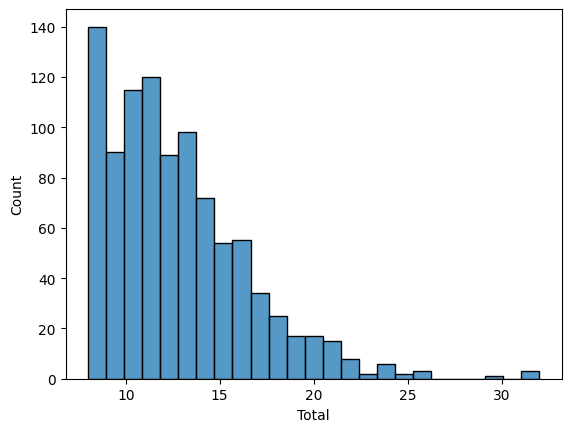

In [59]:
sns.histplot(middle_school_data['Total'])

<Axes: xlabel='Total', ylabel='Density'>

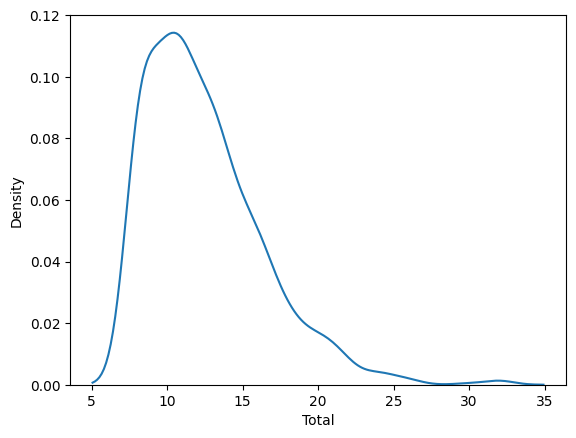

In [61]:
sns.kdeplot(middle_school_data['Total'])

In [73]:
middle_school_data.to_excel("middle_school_data_insomia.xlsx", index= False)